<a href="https://colab.research.google.com/github/Ayman-analyst/Egyptian-League-Analytics/blob/main/Teams_Points_Predicitons_2016_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Columns in merged data: ['Position', 'Team', 'Points', 'Wins', 'Loses', 'Ties', 'Goal Scored', 'Goals Conceded', 'NextSeasonPoints']
               Team  Actual Points  Predicted Points
0           Ahly SC             84              80.0
1           Zamalek             63              60.8
2            Smouha             57              54.1
3          El Masry             62              57.8
4        Wadi Degla             38              42.7
5           Ismaily             54              57.4
6    Entag El Harby             33              33.5
7        EL Dakhlia             31              39.5
8          Enppi SC             43              49.3
9         El Makasa             74              55.5
10         Petrojet             43              33.4
11  Talaea El Gaish             45              30.0
12     El Mokawloon             44              41.0
13     Ittihad Alex             44              38.8
14         Aswan SC             29              32.8


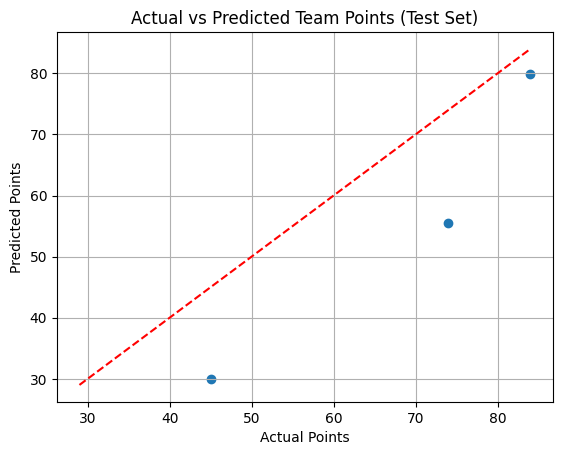

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load current and next season data
current_df = pd.read_csv("/content/drive/MyDrive/Predicitons/2015-2016_Season.csv")
next_df = pd.read_excel("/content/drive/MyDrive/Predicitons/2016-2017_Standing.xlsx")

# Rename target column in next season data
next_df = next_df.rename(columns={'points': 'NextSeasonPoints'})

# Merge both datasets on the 'Team' column
merged_df = pd.merge(current_df, next_df, on='Team')

# Confirm the columns available
print("Columns in merged data:", merged_df.columns.tolist())

# Define features (X) and target (y)
X = merged_df[['Points', 'Wins', 'Loses', 'Ties', 'Goal Scored', 'Goals Conceded']]
y = merged_df['NextSeasonPoints']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for all teams (full dataset)
all_predictions = model.predict(X)

# Create results DataFrame
results = pd.DataFrame({
    'Team': merged_df['Team'],
    'Actual Points': y,
    'Predicted Points': all_predictions.round(1)
})

# Print predictions
print(results)

# Predict on test set and plot results
y_pred_test = model.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Team Points (Test Set)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

# Export predictions to CSV
results.to_csv("/content/drive/MyDrive/Predicitons/Predicted_Team_Points_Regression.csv", index=False)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Feature columns — removed 'Points'
X = merged_df[['Wins', 'Loses', 'Ties', 'Goal Scored', 'Goals Conceded']]
y = merged_df['NextSeasonPoints']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict for all data
merged_df['Predicted Points'] = rf_model.predict(X).round(1)

# Print results (no 'Points' column)
print(merged_df[['Team', 'NextSeasonPoints', 'Predicted Points']])

# Export results to CSV (no 'Points' column)
merged_df[['Team', 'NextSeasonPoints', 'Predicted Points']].to_csv(
    "/content/drive/MyDrive/Predicitons/Predicted_Team_Points_Random Forest.csv", index=False
)


               Team  NextSeasonPoints  Predicted Points
0           Ahly SC                84              59.7
1           Zamalek                63              60.2
2            Smouha                57              54.6
3          El Masry                62              58.7
4        Wadi Degla                38              36.9
5           Ismaily                54              52.2
6    Entag El Harby                33              34.2
7        EL Dakhlia                31              34.0
8          Enppi SC                43              43.5
9         El Makasa                74              52.5
10         Petrojet                43              41.3
11  Talaea El Gaish                45              36.3
12     El Mokawloon                44              41.4
13     Ittihad Alex                44              41.7
14         Aswan SC                29              34.4
